<a href="https://colab.research.google.com/github/amulyakasu/ImageRealm/blob/main/Cartoonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cartoonifying an image**

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow




In [ ]:
filename = '/content/drive/MyDrive/machine learning/sample_images/bridge.jpg'

In [ ]:
img = cv.imread(filename)
cv2_imshow(img)


In [ ]:
def edge_mask(img):#, line_size, blur_value):
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  gray_blur = cv.medianBlur(gray, 7) #blur_value   #larger blur value, fewer black noises    #median blur better than guassian, avg blur
  edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)# line_size, blur_value)   #adaptive better than simple
  return edges

In [ ]:
def color_quantization(img):#, k):
  data = np.float32(img).reshape((-1, 3))
  # Determine criteria
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv.kmeans(data, 11, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)                                                                        #uint8 range 0 to 255
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

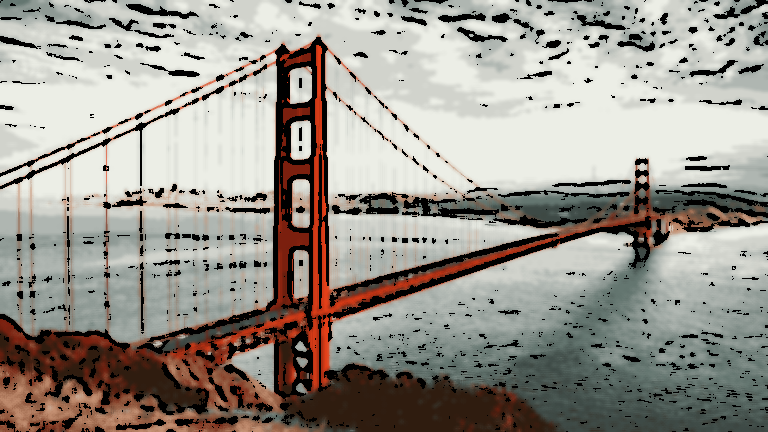

In [ ]:
def cartoonize(img):
  edges = edge_mask(img)
  img = color_quantization(img)
  blurred = cv.bilateralFilter(img, d = 7, sigmaColor = 200,sigmaSpace = 200)
  cartoon = cv.bitwise_and(blurred, blurred, mask = edges)
  return cartoon
  #cv.imshow("Cartoonized image", cartoon)

cartoon_img = cartoonize(img)
cv2_imshow(cartoon_img)